<a href="https://colab.research.google.com/github/cagrisayir/Basic_mnist/blob/master/multilayer_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/MNIST/",one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [0]:
x = tf.placeholder(tf.float32,[None,784])
y_true = tf.placeholder(tf.float32,[None,10])

In [0]:
layer_1 = 128
layer_2 = 64 
layer_3 = 32
layer_out = 10
weight_1 = tf.Variable(tf.truncated_normal([784,layer_1],stddev=0.1))
bias_1 = tf.Variable(tf.constant(0.1,shape=[layer_1]))
weight_2 = tf.Variable(tf.truncated_normal([layer_1,layer_2],stddev=0.1))
bias_2 = tf.Variable(tf.constant(0.1,shape=[layer_2]))
weight_3 = tf.Variable(tf.truncated_normal([layer_2,layer_3],stddev=0.1))
bias_3 = tf.Variable(tf.constant(0.1,shape=[layer_3]))
weight_4 = tf.Variable(tf.truncated_normal([layer_3,layer_out],stddev=0.1))
bias_4 = tf.Variable(tf.constant(0.1,shape=[layer_out]))



In [0]:
y1 = tf.nn.relu(tf.matmul(x,weight_1)+bias_1)
y2 = tf.nn.relu(tf.matmul(y1,weight_2)+bias_2)
y3 = tf.nn.relu(tf.matmul(y2,weight_3)+bias_3)
logits = tf.matmul(y3,weight_4)+bias_4
y4 = tf.nn.softmax(logits)

xent = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels = y_true)
loss = tf.reduce_mean(xent)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
correct_prediction = tf.equal(tf.argmax(y4,1),tf.argmax(y_true,1)) # argmax en büyüğün kaçta olduğunu dönderir
# Tahmin edilen ve doğru olan değer karşılaştırılacak ve True veya false bir değer döndürülecek
#correct_prediction'ın ortalamasını aldığımız zaman modelimiz yüzde kaç oranında resimleri tahmin edebiliyor göreceğiz.
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32)) # boolean'ı floata çevirme

In [0]:
optimize = tf.train.AdamOptimizer(0.001).minimize(loss)
sess= tf.Session()
sess.run(tf.global_variables_initializer())
batch_size = 128
loss_graph= []
def training_step(iterations):
  for i in range(iterations):
    x_batch , y_batch = mnist.train.next_batch(batch_size=batch_size)
    feed_dict_train = {x: x_batch, y_true: y_batch}
    [_,train_loss] = sess.run([optimize,loss],feed_dict = feed_dict_train)

    loss_graph.append(train_loss)
    if i % 100 == 0:
      train_acc = sess.run(accuracy,feed_dict = feed_dict_train)
      print("Iteration :", i,"Training accuracy : ",train_acc,"training loss", train_loss)

def test_accuracy():
  feed_dict_test = {x: mnist.test.images,y_true : mnist.test.labels}
  acc = sess.run(accuracy, feed_dict = feed_dict_test)
  print("Testing accuracy: ",acc)


Iteration : 0 Training accuracy :  0.171875 training loss 2.3003292
Iteration : 100 Training accuracy :  0.8359375 training loss 0.49090037
Iteration : 200 Training accuracy :  0.9140625 training loss 0.30517423
Iteration : 300 Training accuracy :  0.890625 training loss 0.3289261
Iteration : 400 Training accuracy :  0.953125 training loss 0.20983748
Iteration : 500 Training accuracy :  0.9609375 training loss 0.17625016
Iteration : 600 Training accuracy :  0.9375 training loss 0.26890492
Iteration : 700 Training accuracy :  0.9375 training loss 0.1949856
Iteration : 800 Training accuracy :  0.9609375 training loss 0.094860926
Iteration : 900 Training accuracy :  0.9609375 training loss 0.14378846
Iteration : 1000 Training accuracy :  0.984375 training loss 0.13417876
Iteration : 1100 Training accuracy :  0.9609375 training loss 0.15375955
Iteration : 1200 Training accuracy :  0.96875 training loss 0.09931768
Iteration : 1300 Training accuracy :  0.953125 training loss 0.14447984
Itera

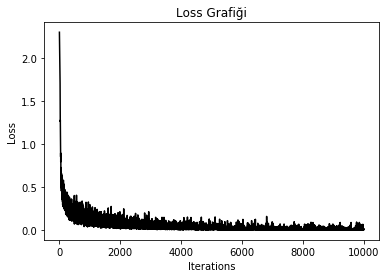

In [0]:
training_step(10000)
test_accuracy()
plt.plot(loss_graph,"k-")
plt.title("Loss Grafiği")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()